# Feature Engineering

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file
df = pd.read_csv('final_data.csv')

In [3]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Columns: 534 entries, Unnamed: 0 to zero_crossing_rate_mean
dtypes: float64(529), int64(2), object(3)
memory usage: 3.7+ MB


In [4]:
# Checking shape
df.head(10)

,Unnamed: 0,Song,Artist,Label,YouTube_URL,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,...,chroma_cqt_mean,chroma_cens_mean,mfcc_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_contrast_mean,spectral_rolloff_mean,tonnetz_mean,zero_crossing_rate_mean
0,0,Break Da Law,21 Savage,1,https://www.youtube.com/watch?v=whxKTWgG1ds,0.036305,0.047070,0.050109,0.060922,0.034601,...,1.623778,1.014919,5.239843,0.053142,1687.797346,1556.881697,14.039387,3441.036562,-0.049836,0.394871
1,1,Out For The Night,21 Savage,1,https://www.youtube.com/watch?v=BXd04k_NFLE,0.039414,0.011306,0.028371,0.008535,0.009176,...,0.292815,0.160291,5.579462,0.211410,1757.936521,1478.461945,14.337854,3292.124684,0.208786,1.333738
2,2,1.5,21 Savage,0,https://www.youtube.com/watch?v=X473_RaP3K0,0.035703,0.018592,0.011017,0.042490,0.082023,...,0.518213,0.186632,6.771062,0.132576,1710.391529,1471.756647,14.259051,3108.303880,0.966245,4.249875
3,3,A Lot,21 Savage,1,https://www.youtube.com/watch?v=DmWWqogr_r8,0.109338,0.108996,0.095882,0.119257,0.087255,...,0.206884,0.490786,6.936685,0.117907,1335.774428,1449.352425,14.712417,2798.265855,1.060119,0.657684
4,4,Can't Leave Without It,21 Savage,1,https://www.youtube.com/watch?v=l5M64JuiZAE,0.002180,0.002320,0.002482,0.002110,0.003241,...,0.383365,0.244204,3.639971,0.164394,1661.124152,1419.222485,14.676958,3131.746880,0.013975,0.553195
5,5,Gun Smoke,21 Savage,0,https://www.youtube.com/watch?v=7iHE4OtP_F0,0.015074,0.019242,0.036479,0.026226,0.037651,...,0.246775,0.120096,6.445930,0.052628,1350.858799,1416.376689,13.937167,2666.569967,0.088556,0.838831
6,6,ASMR,21 Savage,0,https://www.youtube.com/watch?v=UlT8BgOXAoo,0.037127,0.051487,0.049519,0.032200,0.018812,...,0.261004,0.255226,6.937556,0.266676,1312.982076,1314.187076,14.250412,2509.306766,0.353100,5.344713
7,7,All My Friends,21 Savage,1,https://www.youtube.com/watch?v=udOSsEXaUxE,0.061396,0.014509,0.010310,0.009871,0.006992,...,0.619453,0.199588,2.258655,0.050726,1396.515794,1349.149507,14.210389,2724.872484,0.063092,1.898846
8,8,Bank Account,21 Savage,1,https://www.youtube.com/watch?v=H1KBHFXm2Bg,0.001219,0.002645,0.001729,0.000997,0.001623,...,0.291905,0.215389,-2.439351,0.919595,1575.651321,1196.044808,15.750817,2538.001188,0.567243,2.516810
9,9,Red Opps,21 Savage,0,https://www.youtube.com/watch?v=mWISiHcGoNg,0.083005,0.097306,0.054597,0.111046,0.118493,...,0.460240,0.177824,6.217031,1.128935,1936.971320,1616.542725,14.596684,3414.089636,-0.049834,2.490780


In [5]:
# Encoding Label as Popular Unpopular for computaion of numerical columns
# Encoding values for Label (1, 0) to (Popular, Unpopular)
df['Label'] = df['Label'].map({1: 'Popular', 0: 'Unpopular'})

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['YouTube_URL'], inplace=True)

In [7]:
df.head()

,Song,Artist,Label,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,...,chroma_cqt_mean,chroma_cens_mean,mfcc_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_contrast_mean,spectral_rolloff_mean,tonnetz_mean,zero_crossing_rate_mean
0,Break Da Law,21 Savage,Popular,0.036305,0.047070,0.050109,0.060922,0.034601,0.039828,0.058504,...,1.623778,1.014919,5.239843,0.053142,1687.797346,1556.881697,14.039387,3441.036562,-0.049836,0.394871
1,Out For The Night,21 Savage,Popular,0.039414,0.011306,0.028371,0.008535,0.009176,0.010559,0.021577,...,0.292815,0.160291,5.579462,0.211410,1757.936521,1478.461945,14.337854,3292.124684,0.208786,1.333738
2,1.5,21 Savage,Unpopular,0.035703,0.018592,0.011017,0.042490,0.082023,0.033460,0.012815,...,0.518213,0.186632,6.771062,0.132576,1710.391529,1471.756647,14.259051,3108.303880,0.966245,4.249875
3,A Lot,21 Savage,Popular,0.109338,0.108996,0.095882,0.119257,0.087255,0.042775,0.029629,...,0.206884,0.490786,6.936685,0.117907,1335.774428,1449.352425,14.712417,2798.265855,1.060119,0.657684
4,Can't Leave Without It,21 Savage,Popular,0.002180,0.002320,0.002482,0.002110,0.003241,0.006289,0.006231,...,0.383365,0.244204,3.639971,0.164394,1661.124152,1419.222485,14.676958,3131.746880,0.013975,0.553195


In [8]:
# Setting pandas options to display all rows
pd.set_option('display.max_rows', None)

In [9]:
# Checking descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chroma_stft_1,915.0,0.010057,0.014732,0.000000,0.002530,0.005632,0.011438,0.136445
chroma_stft_2,915.0,0.010014,0.015242,0.000000,0.002466,0.005542,0.011513,0.150890
chroma_stft_3,915.0,0.009490,0.013785,0.000000,0.002399,0.005124,0.010588,0.115367
chroma_stft_4,915.0,0.010109,0.016980,0.000000,0.002293,0.005269,0.010652,0.163186
chroma_stft_5,915.0,0.010342,0.018880,0.000000,0.002303,0.005240,0.010597,0.273190
chroma_stft_6,915.0,0.009722,0.016155,0.000000,0.002338,0.005391,0.010417,0.184682
chroma_stft_7,915.0,0.009660,0.014289,0.000000,0.002443,0.005537,0.011009,0.136316
chroma_stft_8,915.0,0.010300,0.016409,0.000000,0.002541,0.005511,0.011156,0.168696
chroma_stft_9,915.0,0.010783,0.018291,0.000000,0.002565,0.005858,0.011418,0.232820
chroma_stft_10,915.0,0.010329,0.015528,0.000000,0.002495,0.005903,0.011563,0.203912


In [10]:
# Checking for null values
df.isnull().sum()

Song                       0
Artist                     0
Label                      0
chroma_stft_1              0
chroma_stft_2              0
chroma_stft_3              0
chroma_stft_4              0
chroma_stft_5              0
chroma_stft_6              0
chroma_stft_7              0
chroma_stft_8              0
chroma_stft_9              0
chroma_stft_10             0
chroma_stft_11             0
chroma_stft_12             0
chroma_stft_13             0
chroma_stft_14             0
chroma_stft_15             0
chroma_stft_16             0
chroma_stft_17             0
chroma_stft_18             0
chroma_stft_19             0
chroma_stft_20             0
chroma_stft_21             0
chroma_stft_22             0
chroma_stft_23             0
chroma_stft_24             0
chroma_stft_25             0
chroma_stft_26             0
chroma_stft_27             0
chroma_stft_28             0
chroma_stft_29             0
chroma_stft_30             0
chroma_stft_31             0
chroma_stft_32

There is no null value present in the dataframe. As they have already been treated.

In [11]:
# Checking shape
df.shape

(915, 532)

In [12]:
# Checking for duplicated values
df.duplicated().sum()

0

There is no duplicated value present in the dataframe. As they have already been treated.

In [13]:
df['Label'].nunique()

2

Dealing with Outliers:

In [14]:
# Selecting only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculating first and third quartile
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1
threshold = 1.5

# Determining outliers using the IQR method
outliers_count = ((numeric_columns < (Q1 - threshold * IQR)) | (numeric_columns > (Q3 + threshold * IQR))).sum()

# Output
print("Number of outlier values in each column:")
print(outliers_count)

Number of outlier values in each column:
chroma_stft_1               74
chroma_stft_2               66
chroma_stft_3               79
chroma_stft_4               77
chroma_stft_5               80
chroma_stft_6               76
chroma_stft_7               80
chroma_stft_8               79
chroma_stft_9               83
chroma_stft_10              78
chroma_stft_11              73
chroma_stft_12              68
chroma_stft_13               5
chroma_stft_14               9
chroma_stft_15               6
chroma_stft_16              10
chroma_stft_17              13
chroma_stft_18              16
chroma_stft_19               8
chroma_stft_20              10
chroma_stft_21              10
chroma_stft_22               8
chroma_stft_23               3
chroma_stft_24               4
chroma_stft_25              11
chroma_stft_26              21
chroma_stft_27              16
chroma_stft_28              21
chroma_stft_29              33
chroma_stft_30              32
chroma_stft_31              2

There is Outlier present in almost every column

In [15]:
# Selecting only numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculating first and third quartile
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
threshold = 1.5

# Determining outliers using the IQR
outliers_count = ((numeric_columns < (Q1 - threshold * IQR)) | (numeric_columns > (Q3 + threshold * IQR))).sum()

# Columns with less than 100 outliers
columns_to_replace = outliers_count[outliers_count < 100].index.tolist()

# Columns with more than 100 outliers
columns_to_remove = outliers_count[outliers_count >= 100].index.tolist()

# Replacing outliers with median for columns with less than 100 outliers
for column in columns_to_replace:
    median = df[column].median()
    df[column] = df[column].mask((df[column] < (Q1[column] - threshold * IQR[column])) | (df[column] > (Q3[column] + threshold * IQR[column])), median)

# Removing outliers for columns with more than 100 outliers
for column in columns_to_remove:
    df = df[~((df[column] < (Q1[column] - threshold * IQR[column])) | (df[column] > (Q3[column] + threshold * IQR[column])))]

# Checking if there are still outliers present in the numeric columns
numeric_columns_after = df.select_dtypes(include=['float64', 'int64'])
outliers_count_after = ((numeric_columns_after < (Q1 - threshold * IQR)) | (numeric_columns_after > (Q3 + threshold * IQR))).sum()

print("Outliers count after handling:")
print(outliers_count_after)

Outliers count after handling:
chroma_stft_1              0
chroma_stft_2              0
chroma_stft_3              0
chroma_stft_4              0
chroma_stft_5              0
chroma_stft_6              0
chroma_stft_7              0
chroma_stft_8              0
chroma_stft_9              0
chroma_stft_10             0
chroma_stft_11             0
chroma_stft_12             0
chroma_stft_13             0
chroma_stft_14             0
chroma_stft_15             0
chroma_stft_16             0
chroma_stft_17             0
chroma_stft_18             0
chroma_stft_19             0
chroma_stft_20             0
chroma_stft_21             0
chroma_stft_22             0
chroma_stft_23             0
chroma_stft_24             0
chroma_stft_25             0
chroma_stft_26             0
chroma_stft_27             0
chroma_stft_28             0
chroma_stft_29             0
chroma_stft_30             0
chroma_stft_31             0
chroma_stft_32             0
chroma_stft_33             0
chroma_stft_

I have removed the row if a column contains more than 100 outlier values and for the columns less than 100 i am replacing the outlier value with median. As we know the data point that we obtained are legit and are feature points.

In [16]:
# Checking for the sape of dataframe
df['Label'].nunique()

2

In [17]:
df.shape

(262, 532)

In [18]:
df.head()

,Song,Artist,Label,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,...,chroma_cqt_mean,chroma_cens_mean,mfcc_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_contrast_mean,spectral_rolloff_mean,tonnetz_mean,zero_crossing_rate_mean
5,Gun Smoke,21 Savage,Unpopular,0.015074,0.019242,0.005124,0.005269,0.005240,0.005391,0.005537,...,0.246775,0.120096,6.445930,0.052628,1350.858799,1416.376689,13.937167,2666.569967,0.088556,0.838831
8,Bank Account,21 Savage,Popular,0.001219,0.002645,0.001729,0.000997,0.001623,0.000503,0.000216,...,0.291905,0.215389,-2.439351,0.144903,1575.651321,1196.044808,15.750817,2538.001188,0.102778,2.516810
10,Monster,21 Savage,Unpopular,0.008234,0.006061,0.004474,0.003694,0.002972,0.001928,0.001194,...,0.226525,0.247301,1.305412,0.193998,1985.911142,1524.126969,15.213308,3357.719495,0.102778,0.774660
13,X,21 Savage & Metro Boomin Featuring Future,Popular,0.004462,0.003058,0.015316,0.001225,0.001486,0.000387,0.000805,...,0.263986,0.281309,-3.692561,0.144903,2188.081313,1429.744496,15.018427,3531.038026,0.347211,0.521670
15,Youngblood,5 Seconds Of Summer,Popular,0.000684,0.001071,0.000964,0.001273,0.002308,0.003793,0.006378,...,0.385668,0.175470,-5.365026,0.181150,1529.129211,1293.053830,16.307778,2901.811126,0.057429,0.619299


In [19]:
# Scaling the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Applying min-max scaling to each column (excluding the 'Label' column)
for column in df.columns:
    if column != 'Label' and df[column].dtype in ['int64', 'float64']:
        df[[column]] = scaler.fit_transform(df[[column]])

# DataFrame after scaling
df.head()

,Song,Artist,Label,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,...,chroma_cqt_mean,chroma_cens_mean,mfcc_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_contrast_mean,spectral_rolloff_mean,tonnetz_mean,zero_crossing_rate_mean
5,Gun Smoke,21 Savage,Unpopular,0.741614,0.772610,0.231362,0.236623,0.228369,0.241063,0.293234,...,0.108177,0.167866,0.927022,0.295937,0.292157,0.519968,0.182042,0.389650,0.291530,0.200725
8,Bank Account,21 Savage,Popular,0.053306,0.101770,0.073303,0.040584,0.069191,0.020524,0.007684,...,0.168556,0.391670,0.300323,0.407898,0.480242,0.209660,0.643087,0.329999,0.314908,0.605360
10,Monster,21 Savage,Unpopular,0.401817,0.239858,0.201064,0.164357,0.128530,0.084804,0.060205,...,0.081085,0.466617,0.564450,0.467467,0.823510,0.671720,0.506447,0.710313,0.314908,0.185250
13,X,21 Savage & Metro Boomin Featuring Future,Popular,0.214428,0.118495,0.705800,0.051053,0.063164,0.015262,0.039297,...,0.131204,0.546488,0.211932,0.407898,0.992667,0.538795,0.456907,0.790725,0.716704,0.124243
15,Youngblood,5 Seconds Of Summer,Popular,0.026768,0.038162,0.037682,0.053287,0.099337,0.168963,0.338340,...,0.294001,0.297915,0.093969,0.451878,0.441317,0.346284,0.784671,0.498791,0.240364,0.147786


In [20]:
# checking shape
df.shape

(262, 532)

Data Scaling: Using MinMaxScaler we can scale our data in between 0 to 1

Polynomial Feature:

In [21]:
# importing polynomial feature
from sklearn.preprocessing import PolynomialFeatures

# Initializing PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Extracting numerical data
X_numerical = df.select_dtypes(include=['number'])

# Fiting and transforming numerical data to polynomial features
X_poly = poly.fit_transform(X_numerical)

# Generating column names for the polynomial features
poly_column_names = poly.get_feature_names_out(X_numerical.columns)

# Converting the result to DataFrame
df_poly = pd.DataFrame(X_poly, columns=poly_column_names, index=df.index)

# Concatenating the polynomial features DataFrame with the original DataFrame
df_final = pd.concat([df.drop(columns=X_numerical.columns), df_poly], axis=1)

# Now df_final contains both the polynomial features and the original categorical columns

In [22]:
# Viewing top 5 rows
df_final.head()

,Song,Artist,Label,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,...,spectral_contrast_mean^2,spectral_contrast_mean spectral_rolloff_mean,spectral_contrast_mean tonnetz_mean,spectral_contrast_mean zero_crossing_rate_mean,spectral_rolloff_mean^2,spectral_rolloff_mean tonnetz_mean,spectral_rolloff_mean zero_crossing_rate_mean,tonnetz_mean^2,tonnetz_mean zero_crossing_rate_mean,zero_crossing_rate_mean^2
5,Gun Smoke,21 Savage,Unpopular,0.741614,0.772610,0.231362,0.236623,0.228369,0.241063,0.293234,...,0.033139,0.070932,0.053071,0.036540,0.151827,0.113594,0.078212,0.084990,0.058517,0.040290
8,Bank Account,21 Savage,Popular,0.053306,0.101770,0.073303,0.040584,0.069191,0.020524,0.007684,...,0.413561,0.212218,0.202513,0.389299,0.108899,0.103919,0.199768,0.099167,0.190633,0.366461
10,Monster,21 Savage,Unpopular,0.401817,0.239858,0.201064,0.164357,0.128530,0.084804,0.060205,...,0.256489,0.359736,0.159484,0.093820,0.504545,0.223683,0.131586,0.099167,0.058337,0.034318
13,X,21 Savage & Metro Boomin Featuring Future,Popular,0.214428,0.118495,0.705800,0.051053,0.063164,0.015262,0.039297,...,0.208764,0.361288,0.327467,0.056768,0.625247,0.566716,0.098242,0.513664,0.089046,0.015436
15,Youngblood,5 Seconds Of Summer,Popular,0.026768,0.038162,0.037682,0.053287,0.099337,0.168963,0.338340,...,0.615708,0.391387,0.188607,0.115963,0.248793,0.119891,0.073714,0.057775,0.035522,0.021841


In [23]:
# Checking information
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 5 to 912
Columns: 140717 entries, Song to zero_crossing_rate_mean^2
dtypes: float64(140714), object(3)
memory usage: 281.3+ MB


In [24]:
# Checking Shape
df_final.shape

(262, 140717)

In [25]:
# Checking df shape
df.shape

(262, 532)

We have acquired 140714 columns after preforming polynomial featuring. Many columns contain very high values so preforming data scaling to tune the data. Since the number of rows have increased, we need to check for missing values 

In [26]:
# # Selecting only numeric columns from df_poly
# numeric_columns_poly = df_poly.select_dtypes(include=['int64', 'float64']).columns

# # Calculating the correlation matrix for numeric columns
# corr_matrix = df_poly[numeric_columns_poly].corr()

# # Displaying the correlation matrix for numeric columns
# print("Correlation Matrix for Numeric Columns:")
# print(corr_matrix)

# It requires a very large memory to calculate the correlation matrix

In [27]:
# # Scaling the dataframe
# from sklearn.preprocessing import MinMaxScaler

# # Initializing MinMaxScaler
# scaler = MinMaxScaler()

# # Applying min-max scaling to each column
# for column in df.columns:
#     if df[column].dtype in ['int64', 'float64']:
#         df[[column]] = scaler.fit_transform(df[[column]])

# # DataFrame after scaling
# df.head()

Principal Component Analysis:

In [28]:
# Importing requirements for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extracting numerical columns
numerical_columns = df_final.select_dtypes(include=['number']).columns

# Extracting categorical columns
categorical_columns = df_final.drop(columns=numerical_columns).columns

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final[numerical_columns])

# Initializing PCA with 50% variance explained
pca = PCA(n_components=0.50)

# Fitting PCA to scaled numerical data and transforming it
X_pca = pca.fit_transform(X_scaled)

# Creating DataFrame from PCA results
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)], index=df_final.index)

# Concatenating PCA DataFrame with categorical columns and target variable
df_final_pca = pd.concat([df_final[categorical_columns], df_pca], axis=1)

# Now df_final_pca contains both the PCA components and original categorical columns


If we go for the data that explains less than 40% of the variance then we might risk losing important information. But, it helps in reducing overfitting during modeling.

In [29]:
# Checking the final DataFrame after PCA
df_final_pca.head()

,Song,Artist,Label,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
5,Gun Smoke,21 Savage,Unpopular,217.778072,5.178675,59.523433,-57.545132,109.693361,84.933098,-23.822052,...,88.893056,31.988010,72.013385,22.629417,2.987139,-8.473347,-16.617323,56.510582,-10.716302,-9.978425
8,Bank Account,21 Savage,Popular,8.997858,9.232807,-19.107245,-9.207286,-96.725596,113.682720,-41.158857,...,-60.116612,0.894825,23.102465,-54.266331,-2.742280,3.641246,2.238065,-9.331464,-54.001478,-7.551556
10,Monster,21 Savage,Unpopular,89.551273,55.975653,-33.644991,-50.167870,-84.392725,15.009782,78.003824,...,27.299177,45.813469,-32.509676,-0.587473,52.824897,-33.879289,-57.405587,-39.192014,22.341323,7.381429
13,X,21 Savage & Metro Boomin Featuring Future,Popular,50.251343,65.280098,-23.255989,24.892724,-117.853389,-19.419696,61.331924,...,-21.430970,-30.800034,-33.859842,-17.930856,29.336462,43.951412,-28.697984,-13.807712,15.601290,4.307003
15,Youngblood,5 Seconds Of Summer,Popular,-175.611672,11.165726,35.649720,-114.647831,-26.336128,-26.758468,-22.840631,...,2.291090,-25.236162,-19.448258,49.935816,46.808053,49.715183,-0.162495,14.693898,-43.389356,25.287289


In [30]:
# Checking Info
df_final_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 5 to 912
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Song    262 non-null    object 
 1   Artist  262 non-null    object 
 2   Label   262 non-null    object 
 3   PC1     262 non-null    float64
 4   PC2     262 non-null    float64
 5   PC3     262 non-null    float64
 6   PC4     262 non-null    float64
 7   PC5     262 non-null    float64
 8   PC6     262 non-null    float64
 9   PC7     262 non-null    float64
 10  PC8     262 non-null    float64
 11  PC9     262 non-null    float64
 12  PC10    262 non-null    float64
 13  PC11    262 non-null    float64
 14  PC12    262 non-null    float64
 15  PC13    262 non-null    float64
 16  PC14    262 non-null    float64
 17  PC15    262 non-null    float64
 18  PC16    262 non-null    float64
 19  PC17    262 non-null    float64
 20  PC18    262 non-null    float64
dtypes: float64(18), object(3)
memory usage: 45.0

Before exporting to csv file, i am going to again preform encoding on Label feature

In [31]:
# Encoding Label back to 1 and 0
# Encoding values for Label (Popular, Unpopular) to (1, 0)
df_final_pca['Label'] = df_final_pca['Label'].map({'Popular': 1, 'Unpopular': 0})

In [32]:
# Exporting the final data
df_final_pca.to_csv('final_pca_data.csv', index=False)

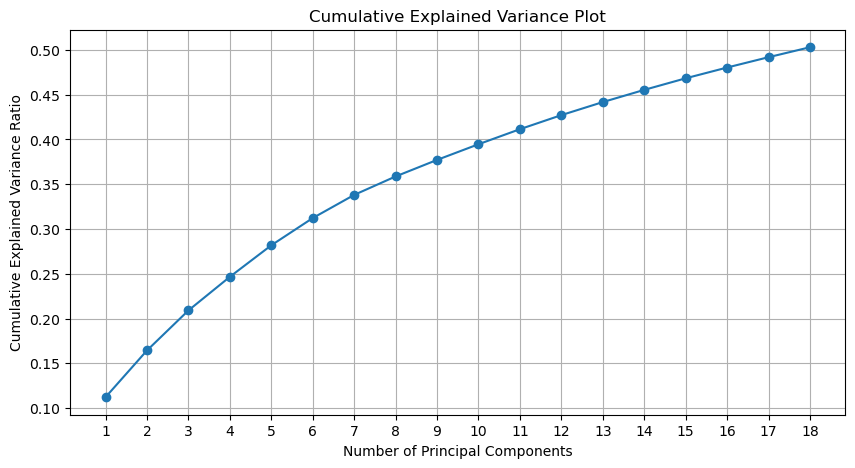

In [33]:
import matplotlib.pyplot as plt

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

In [34]:
df_final_pca.head()

,Song,Artist,Label,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
5,Gun Smoke,21 Savage,0,217.778072,5.178675,59.523433,-57.545132,109.693361,84.933098,-23.822052,...,88.893056,31.988010,72.013385,22.629417,2.987139,-8.473347,-16.617323,56.510582,-10.716302,-9.978425
8,Bank Account,21 Savage,1,8.997858,9.232807,-19.107245,-9.207286,-96.725596,113.682720,-41.158857,...,-60.116612,0.894825,23.102465,-54.266331,-2.742280,3.641246,2.238065,-9.331464,-54.001478,-7.551556
10,Monster,21 Savage,0,89.551273,55.975653,-33.644991,-50.167870,-84.392725,15.009782,78.003824,...,27.299177,45.813469,-32.509676,-0.587473,52.824897,-33.879289,-57.405587,-39.192014,22.341323,7.381429
13,X,21 Savage & Metro Boomin Featuring Future,1,50.251343,65.280098,-23.255989,24.892724,-117.853389,-19.419696,61.331924,...,-21.430970,-30.800034,-33.859842,-17.930856,29.336462,43.951412,-28.697984,-13.807712,15.601290,4.307003
15,Youngblood,5 Seconds Of Summer,1,-175.611672,11.165726,35.649720,-114.647831,-26.336128,-26.758468,-22.840631,...,2.291090,-25.236162,-19.448258,49.935816,46.808053,49.715183,-0.162495,14.693898,-43.389356,25.287289
